In [6]:
import numpy as np
import matplotlib.pyplot as plt

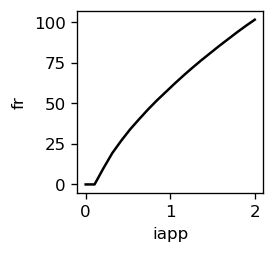

In [50]:
# read firing rate for pv
pv_rate, ics = [], []
with open("./pv_firing_rate_mpi.txt", "r") as fid:
    line = fid.readline()
    while line:
        tmp = line.split(":")
        x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
        val = float(tmp[1][:-1])
        line = fid.readline()
        
        pv_rate.append(val)
        ics.append(x3)
pv_rate = np.array(pv_rate)
    
plt.figure(dpi=120, figsize=(2,2))
plt.plot(ics, pv_rate, "k")
plt.ylabel("fr")
plt.xlabel("iapp")
plt.show()

In [53]:
def read_firing_rate(fname_out, fname_param):
    
    # read parameters
    param_names = []
    params = []
    with open(fname_param, "r") as fid:
        line = fid.readline()
        while line:
            tmp = line.split(":")
            param_names.append(tmp[0])
            params.append([float(x) for x in tmp[1].split(",")[:-1]])
            line = fid.readline()
    
    # read result
    sz = [len(p) for p in params]
    frs = np.ones(sz)
    with open(fname_out, "r") as fid:
        line = fid.readline()
        while line:
            tmp = line.split(":")
            # read idx
            nid = [int(n) for n in tmp[0].split(",")]
            # frs[nid] = float(tmp[1])
            frs[nid[0],nid[1],nid[2]] = float(tmp[1])
            line = fid.readline()
            
    return frs, params, param_names

In [59]:
frs, params, param_names = read_firing_rate("./firing_rate_mpi.txt", "params.txt")

In [86]:
dfr = frs - pv_rate.reshape([1,1,-1])
dfr[frs == 0] = np.nan

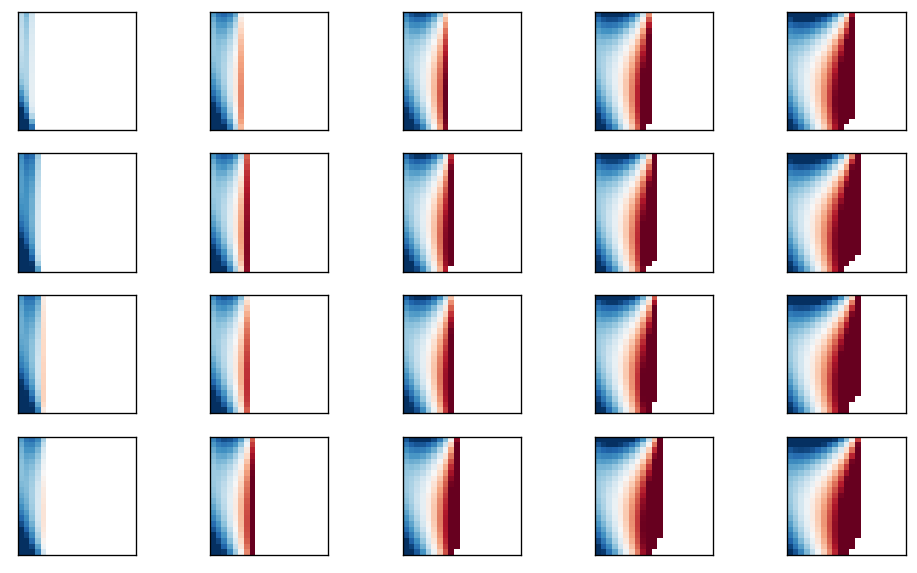

In [92]:
# r = [20, 10]/

fig, axs = plt.subplots(4, 5, dpi=120, figsize=(10, 6))

for n in range(20):
    i = n//4
    j = n%4
    plt.axes(axs[j][i])
    plt.imshow(dfr[:,:,n], cmap="RdBu", vmax=30, vmin=-30)
    plt.xticks([])
    plt.yticks([])
plt.show()

# for i,n in enumerate(range(0,20,2)):
#     plt.axes(axs[i])
#     plt.imshow(dfr[:,:,n], cmap="RdBu", vmax=30, vmin=-30)
#     # plt.plot(r[0], r[1], 'ko')
#     plt.colorbar()

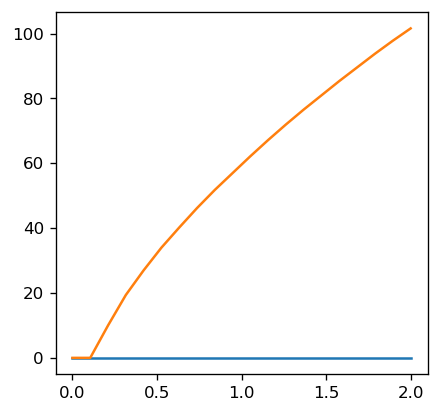

In [78]:
plt.figure(dpi=120, figsize=(4,4))
plt.plot(ics, frs[r[1],r[0],:])
plt.plot(ics, pv_rate)
plt.show()

In [34]:
def read_firing_rate(fname):
    firing_rates = []
    xs = [[], [], []]
    count = 0
    with open(fname, "r") as fp:
        line = fp.readline()
        while line:
            tmp = line.split(":")
            x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
            val = float(tmp[1][:-1])
            firing_rates.append(val)
            line = fp.readline()
            
            xs[0].append(x1)
            xs[1].append(x2)
            xs[2].append(x3)
    xs = [np.unique(x) for x in xs]
    firing_rates = np.reshape(firing_rates, [len(d) for d in xs])
    return firing_rates, xs

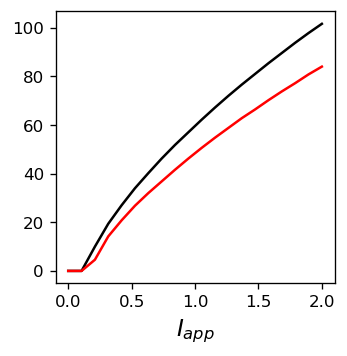

In [68]:
# control params: cm, gk, iapp
fr_pv, xs_pv = read_firing_rate("./pv_firing_rate_mpi.txt")
fr, xs = read_firing_rate("./firing_rate_mpi.txt")

# sample
%matplotlib inline
plt.figure(dpi=120, figsize=(3,3))
plt.plot(xs_pv[2], fr_pv[0,0,:], 'k')
plt.plot(xs[2], fr[12,19,:], c='r')
plt.xlabel(r"$I_{app}$", fontsize=14)
plt.show()

In [114]:
xs[1][nid[1]]

13.473684

1.289474 11.894737


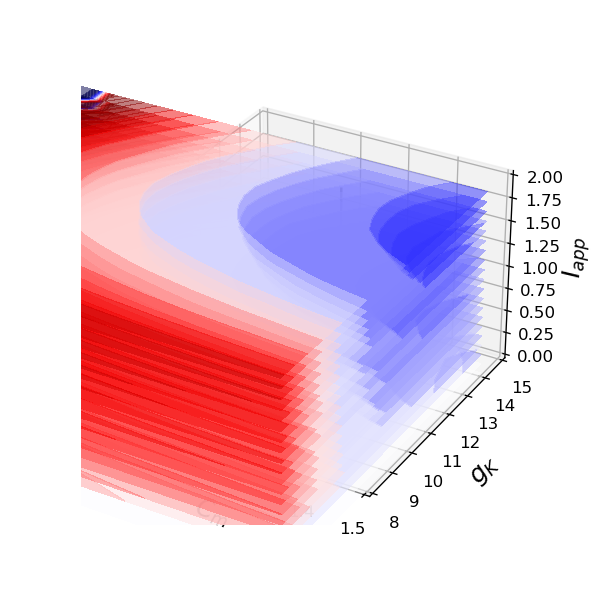

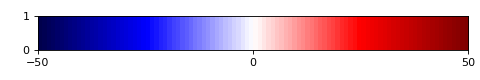

In [136]:
dfr = fr - fr_pv
cl = [-50, 50]
nid = [15, 15]

%matplotlib ipympl
x, y = np.meshgrid(xs[0], xs[1])

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, dfr[:,:,n], 30, zdir='z', offset=xs[2][n], cmap='seismic', vmax=cl[1], vmin=cl[0], alpha=0.5)
# ax.set_zlim([0., 1.])
# ax.plot([1.5,1.5],[14,14], [0,2], c='k', lw=2)

x0, x1 = xs[0][nid[0]], xs[1][nid[1]]
ax.plot([x0, x0], [x1, x1], [-0.1, 2.1], c='k', lw=1.5)
print(x0, x1)

ax.set_zlim([xs[2][0], xs[2][-1]])
plt.xlabel(r"$C_m$", fontsize=15)
plt.ylabel(r"$g_K$", fontsize=15)
ax.set_zlabel(r"$I_{app}$", fontsize=15)
plt.xlim([1, 1.5])
plt.ylim([8, 15])
plt.show()

plt.figure(dpi=80, figsize=(6, 1))
plt.imshow(np.arange(cl[0], cl[1]).reshape([1, -1]), aspect='auto', extent=[cl[0], cl[1], 0, 1], cmap="seismic")
plt.tight_layout()
plt.xticks([cl[0], 0, cl[1]])
plt.show()

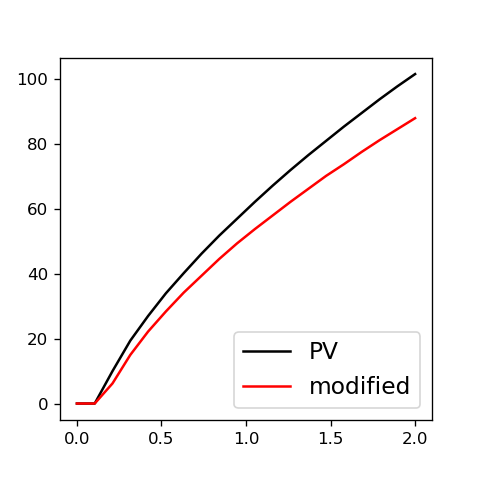

In [146]:
plt.figure(dpi=120, figsize=(4, 4))
plt.plot(xs[2], fr_pv[0,0,:], c='k', label="PV")
plt.plot(xs[2], fr[nid[0],nid[1],:], c='r', label="modified")
plt.legend(loc="lower right" , fontsize=14)
plt.show()

In [69]:
tmp = fr - fr_pv

In [70]:
tmp.shape

(20, 20, 20)

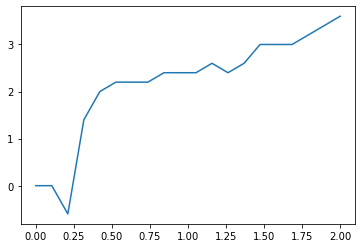

In [76]:
plt.plot(xs[2], tmp[5,15,:])

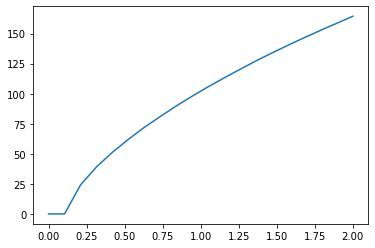

In [50]:
plt.plot(xs[2], fr[0,1,:])

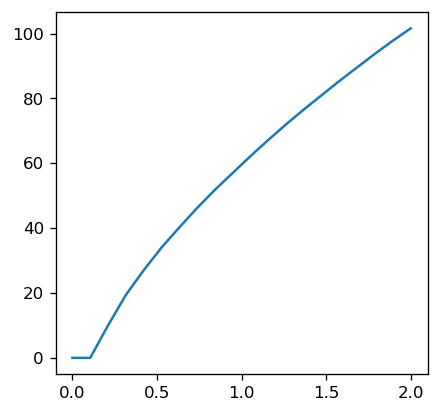

In [42]:
%matplotlib inline
plt.figure(dpi=120, figsize=(4,4))
plt.plot(xs[2], firing_rates[0,0,:])
plt.show()

In [3]:
firing_rates = []
# controlled Cm, gK, iapp


with open("firing_rate_mpi.txt", "r") as fp:
    line = fp.readline()
    while line:
        tmp = line.split(":")
        x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
        val = float(tmp[1][:-1])
        # if val == 0:
        #     val = np.nan
        firing_rates.append(val)
        line = fp.readline()
        
firing_rates = np.reshape(firing_rates, [20,20,20])

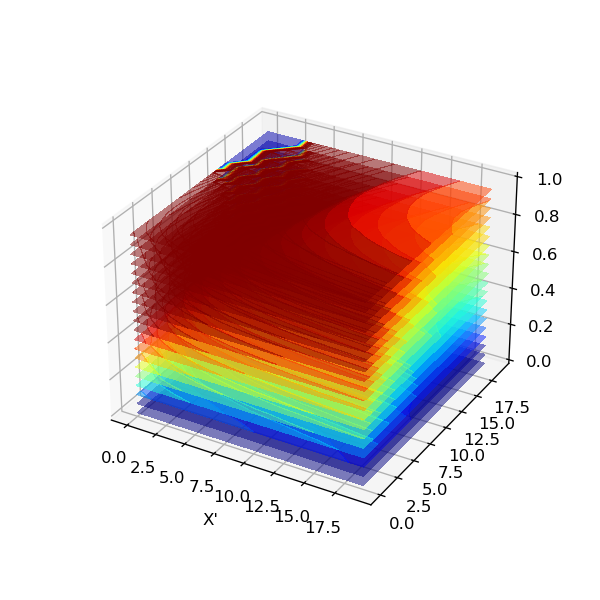

In [16]:
%matplotlib ipympl
x, y = np.meshgrid(np.arange(20), np.arange(20))

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, firing_rates[:,:,n], 30, zdir='z', offset=n/20, cmap='jet', vmax=100, alpha=0.5)
ax.set_zlim([0., 1.])
plt.xlabel("X'")
plt.show()

In [5]:
print("a")

a


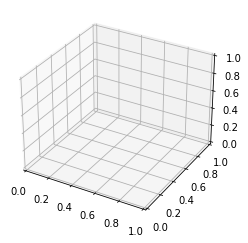

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

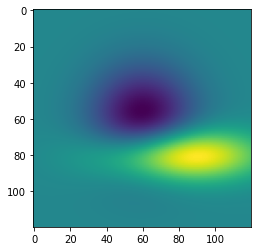

In [12]:
plt.imshow(Z)

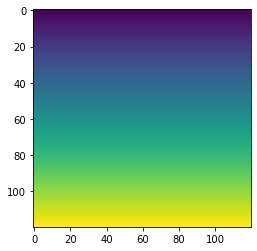

In [11]:
plt.imshow(Y)

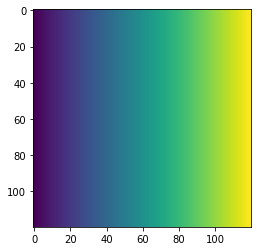

In [10]:
plt.imshow(X)

ValueError: Argument Z must be 2-dimensional.

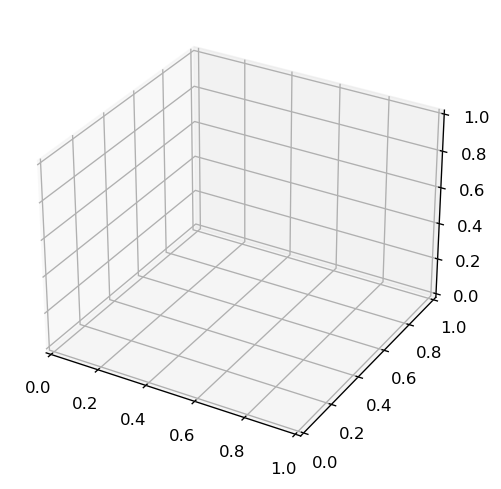

In [6]:
x, y = np.meshgrid(np.arange(20), np.arange(20))

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')
ax.plot_surface(x, y, firing_rates)

In [ ]:
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

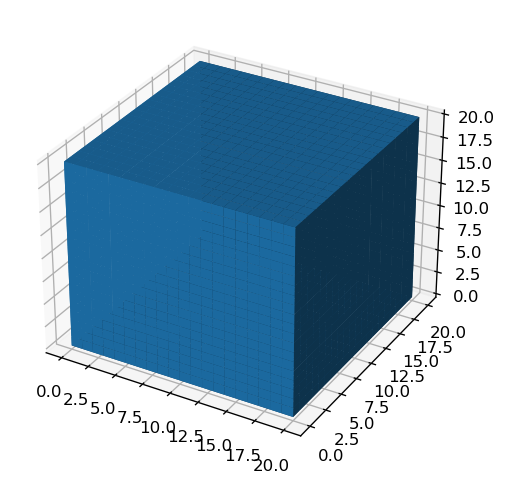

In [39]:
ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')
# plt.imshow(firing_rates[:,:,3])
ax.voxels(firing_rates)
plt.show()

In [ ]:
ax.

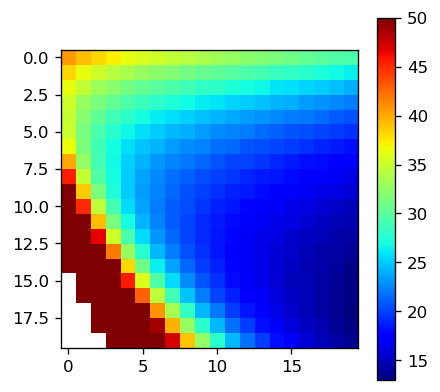

In [34]:
plt.figure(dpi=120, figsize=(4,4))
plt.imshow(firing_rates[:,:,3], cmap="jet", vmax=50)
plt.colorbar()

In [6]:
x1

1.5